In [1]:
"""
    Assignment 4
        Class: Intro to Data Analysis (CS6850)
        Instructor: Dr. Hamid Karimi
        Date: February 24, 2024
        Student: Paul Semadeni
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, e
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# TODO: Apply equal width discretization to produce 5 bins to the "Close" column. Display the first 5 discretized values by using the head() function.
print("\nEqual Width Discretization".upper())
with open("./files/msft.csv") as file:
    stock_prices_df = pd.read_csv(file)
bins = pd.cut(stock_prices_df["Close"], 5)
print(bins.head())


EQUAL WIDTH DISCRETIZATION
0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64, right]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] < (44.232, 53.926] < (53.926, 63.62]]


In [3]:
# TODO: Apply equal frequency discretization to produce 5 bins to the "Close" column.
print("\nEqual Frequency Discretization".upper())
quartiles = [0, 0.20, 0.40, 0.60, 0.80, 1]
bins = pd.qcut(stock_prices_df["Close"], quartiles)
print(bins.head())


EQUAL FREQUENCY DISCRETIZATION
0    (44.4, 63.62]
1    (44.4, 63.62]
2    (44.4, 63.62]
3    (44.4, 63.62]
4    (44.4, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64, right]): [(15.149000000000001, 25.89] < (25.89, 28.678] < (28.678, 31.854] < (31.854, 44.4] < (44.4, 63.62]]


In [4]:
# TODO: Implement entropy-based discretization (supervised discretization) and apply it to the vehicles dataset. Implement it using recursion. Come up with a threshold to stop splitting the data. Note that you must perform the discretization separately for each feature (column). Print each feature, its discretized ranges, and the corresponding final entropy.
print("\nEntropy-based Discretization".upper())
def compute_entropy(label):
    # Reference: https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python
    num_rows = len(label)
    values, counts = np.unique(label, return_counts=True)
    probabilities = counts/num_rows

    entropy = 0
    for prob in probabilities:
        entropy -= prob * log(prob, 2)
    return entropy

def entropy_based_discretization(column, col_name):
    inital_column_len = len(column)
    column = column.sort_values(by=[col_name]).reset_index(drop=True)
    # Compute last bin entropy
    last_bin_count = loop_through_columns(column[::-1], 0.001)
    last_bin = column[len(column["class"]) - last_bin_count:len(column["class"])]
    last_range = (column.iat[len(column["class"]) - last_bin_count, 0],column.iat[len(column["class"]) - 1, 0])
    last_bin_entropy = compute_entropy(last_bin["class"])
    # Update column values
    column = column[:len(column["class"]) - last_bin_count]
    # Compute first bin entropy
    first_bin_count = loop_through_columns(column, 0.001)
    first_bin = column[:first_bin_count]
    first_range = (column.iat[0, 0],column.iat[first_bin_count - 1, 0])
    first_bin_entropy = compute_entropy(first_bin["class"])
    # Update column values
    column = column[first_bin_count:]
    final_len_column = len(column)
    final_entropy = compute_entropy(column["class"])
    # final_range = (column.iat[0, 0],column.iat[len(column["class"]) - 1, 0])
    # Calculate ET = first_bin * E1 + column * E2 + last_bin * E3
    ET = ((first_bin_count/inital_column_len) * first_bin_entropy) + ((final_len_column/inital_column_len) * final_entropy) + ((last_bin_count/inital_column_len) * last_bin_entropy)
    print(f"{col_name}: \n\t{first_range},{(first_range[1], last_range[0])},{last_range}\n\t", ET)
    return

def loop_through_columns(columns, threshold=0.05):
    column = columns["class"]
    # This algorithm makes sure that he threshold % of the opposite value is included in the bin
    a_count = 0
    a_included = False
    b_count = 0
    b_included = False
    col_value = 0
    for c in column:
        if c == 0:
            a_count += 1
            a_included = True
        else:
            b_count += 1
            b_included = True
        a_logic = (((a_count / (a_count + b_count)) < threshold) and b_included)
        b_logic = (((b_count / (a_count + b_count)) < threshold) and a_included)
        # Check the threshold
        if a_logic != b_logic:
            continue
        else:
            # Threshold has been met but need to get rest of matching values
            col_value = columns.iat[a_count + b_count, 0]
            if a_count + b_count + 1 < len(column):
                next_col_value = columns.iat[a_count + b_count + 1, 0]
                if next_col_value != col_value:
                    break
            else:
                break
    return a_count + b_count + 1

with open("./files/vehicles.csv") as file:
    vehicles_df = pd.read_csv(file)
vehicles_df = vehicles_df[((vehicles_df["class"] == "van") | (vehicles_df["class"] == "bus"))]
vehicles_df["class"] = vehicles_df["class"].replace(["van"],0)
vehicles_df["class"] = vehicles_df["class"].replace(["bus"],1)

for col in vehicles_df:
    col_name = str(col)
    if col_name != "class":
        entropy_based_discretization(vehicles_df[[col_name, "class"]], col_name)


ENTROPY-BASED DISCRETIZATION
compactness: 
	(78, 82),(82, 100),(100, 114)
	 0.8395297212099355
circularity: 
	(34, 35),(35, 50),(50, 58)
	 0.9049970985624661
distance_circularity: 
	(44, 59),(59, 91),(91, 109)
	 0.9019025314874547
radius_ratio: 
	(105, 113),(113, 250),(250, 333)
	 0.9826986872586457
pr_axis_aspect_ratio: 
	(47, 48),(48, 105),(105, 138)
	 0.9946026082093788
max_length_aspect_ratio: 
	(2, 4),(4, 52),(52, 55)
	 0.9977309967344424
scatter_ratio: 
	(114, 142),(142, 163),(163, 265)
	 0.613527042202002
elongatedness: 
	(26, 42),(42, 47),(47, 58)
	 0.6040710000845412
pr_axisrectangular: 
	(17, 18),(18, 20),(20, 29)
	 0.7232687911665271
lengthrectangular: 
	(121, 124),(124, 170),(170, 175)
	 0.9847302527001892
majorvariance: 
	(134, 163),(163, 287),(287, 320)
	 0.7263890131273226
minorvariance: 
	(194, 300),(300, 387),(387, 1018)
	 0.60120422276481
gyrationradius: 
	(109, 118),(118, 201),(201, 268)
	 0.9020949426148821
majorskewness: 
	(61, 65),(65, 119),(119, 135)
	 0.9278060

In [5]:
# TODO: Compute the Mean Absolute Deviation of features (columns) as well correlation matrix of vehicles dataset. Based on the mean absolute deviation, what are the best features? Also, according to the correlation matrix, choose a few features that can/should be removed.
print("\nMean Absolute Deviation".upper())
with open("./files/vehicles.csv") as file:
    vehicles_df = pd.read_csv(file)
for col in vehicles_df:
    col_name = str(col)
    if col_name != "class":
        abs_val_sum = 0
        num_elements = len(vehicles_df[col_name])
        mean = vehicles_df[col_name].mean()
        for row in vehicles_df[col_name]:
            abs_val_sum += abs(row - mean)
        mad = round(abs_val_sum/num_elements, 1)
        print(f"{col_name} mean absolute deviation: ", mad)
print("\nCorrelation Matrix".upper())
print(vehicles_df.drop(columns=["class"]).corr())


MEAN ABSOLUTE DEVIATION
compactness mean absolute deviation:  6.8
circularity mean absolute deviation:  5.1
distance_circularity mean absolute deviation:  13.4
radius_ratio mean absolute deviation:  28.0
pr_axis_aspect_ratio mean absolute deviation:  5.1
max_length_aspect_ratio mean absolute deviation:  2.3
scatter_ratio mean absolute deviation:  28.3
elongatedness mean absolute deviation:  6.6
pr_axisrectangular mean absolute deviation:  2.2
lengthrectangular mean absolute deviation:  12.0
majorvariance mean absolute deviation:  26.4
minorvariance mean absolute deviation:  150.6
gyrationradius mean absolute deviation:  26.5
majorskewness mean absolute deviation:  5.4
minorskewness mean absolute deviation:  4.0
minorkurtosis mean absolute deviation:  7.3
majorkurtosis mean absolute deviation:  5.0
hollows_ratio mean absolute deviation:  6.1

CORRELATION MATRIX
                         compactness  circularity  distance_circularity  \
compactness                 1.000000     0.692869  


PRINCIPAL COMPONENT ANALYSIS (PCA)


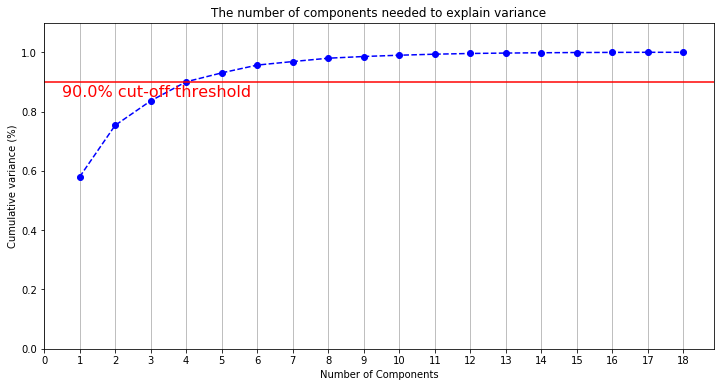

In [23]:
# TODO: Apply PCA to vehicles dataset. You can use PCA from sklearn or calculate PCs from eigenvectors of the covariance matrix as described in the lecture.
def generate_pc(columns, variance_pct):
    scaler = MinMaxScaler()
    data_rescaled = scaler.fit_transform(columns.to_numpy())

    pca = PCA().fit(data_rescaled)
    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, 19, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker="o", linestyle="--", color="b")

    plt.xlabel("Number of Components")
    plt.xticks(np.arange(0, 19, step=1))
    plt.ylabel("Cumulative variance (%)")
    plt.title("The number of components needed to explain variance")

    plt.axhline(y=variance_pct, color="r", linestyle="-")
    plt.text(0.5, 0.85, f"{variance_pct * 100}% cut-off threshold", color="red", fontsize=16)

    ax.grid(axis="x")
    plt.show()
    return

def generate_pc_2(columns, diagram):

    num_components = 2
    cov = columns.cov().to_numpy()
    A = columns.to_numpy()
    [eigvals, pcs] = np.linalg.eig(cov)
    sorted_index = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_index]
    pcs = pcs[:,sorted_index]

    if diagram == "scatter":
        M = (A-np.mean(A.T, axis = 1)).T
        projected = np.dot(pcs.T, M).T
        projected = pd.DataFrame(projected[:,:num_components], columns=["pc1", "pc2"])
        projected.plot(kind="scatter", x="pc1", y="pc2")
        plt.show()
    else:
        num_components = 2
        cov = columns.cov().to_numpy()
        [eigvals, pcs] = np.linalg.eig(cov)
        pcs = pcs[:,:num_components]
        fig, axes = plt.subplots(2, 1, sharex=True)
        attribute = list(columns)
        pcdata = pd.Series(pcs[:,0], index=attribute)
        pcdata.plot(kind="barh", ax=axes[0], color="k", alpha=0.7)
        axes[0].set_title(r"1st PC", size="x-large")
        pcdata = pd.Series(pcs[:,1], index=attribute)
        pcdata.plot(kind="barh", ax=axes[1], color="k", alpha=0.7)
        axes[0].set_title(r"2nd PC", size="x-large")
    return

print("\nPrincipal Component Analysis (PCA)".upper())
generate_pc(vehicles_df.drop(columns=["class"]), 0.90)

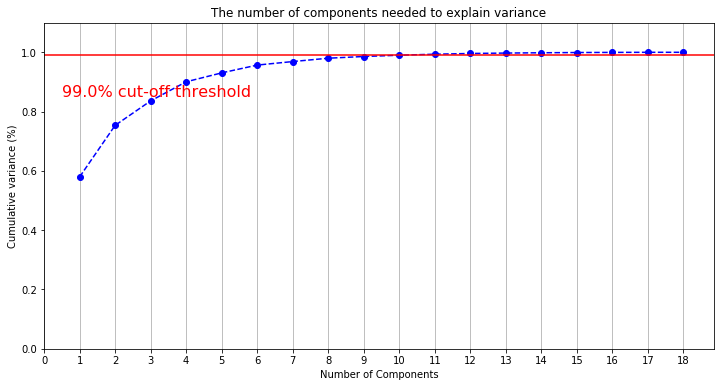

In [20]:
generate_pc(vehicles_df.drop(columns=["class"]), 0.99)

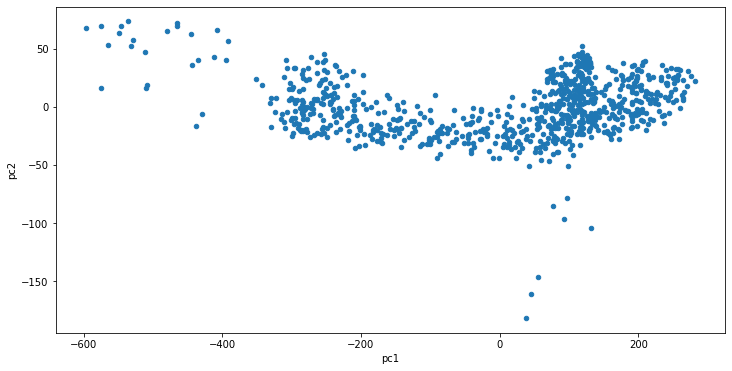

In [21]:
generate_pc_2(vehicles_df.drop(columns=["class"]), "scatter")

AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

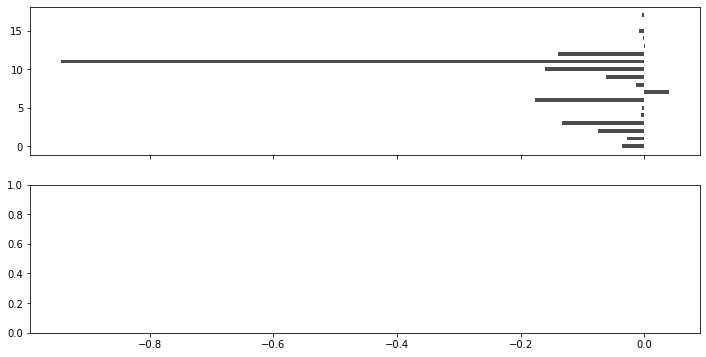

In [24]:
generate_pc_2(vehicles_df.drop(columns=["class"]), "barh")